In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [7]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_paris_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('paris')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/paris_{date}.csv',index=False)
get_listings_paris_timeseries()

FileExistsError: [Errno 17] File exists: 'data5/raw-data'

In [8]:
# pull in detailed_listings
raw_df_paris = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_paris)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(paris_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 49634 AirBnb listings.


In [10]:
paris_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2020-12.csv')
paris_raw_df_12_12_2020.shape


(65917, 16)

In [11]:
# use magic commands 'cd' to change directory
# use glob to locate all files for paris
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_paris = glob.glob('paris/**.csv')
files_paris

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


[]

In [12]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

paris_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(paris_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(paris_raw_df_12_12_2020['price'].mean(),2)}.")

paris_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(paris_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_1_9_2021['price'].mean(),2)}.")

paris_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(paris_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_2_8_2021['price'].mean(),2)}.")

paris_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(paris_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_3_4_2021['price'].mean(),2)}.")

paris_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(paris_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_4_9_2021['price'].mean(),2)}.")

#paris_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(paris_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_5_19_2021['price'].mean(),2)}.")

paris_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(paris_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_6_3_2021['price'].mean(),2)}.")

paris_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(paris_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_7_4_2021['price'].mean(),2)}.")

paris_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(paris_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_8_6_2021['price'].mean(),2)}.")

paris_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(paris_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_9_7_2021['price'].mean(),2)}.")

paris_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(paris_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_10_6_2021['price'].mean(),2)}.")

#paris_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(paris_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 65917 AirBnb listings; the avg price is €114.28.
The 1_9_2021 dataset contains 65256 AirBnb listings; the avg price is €112.89.
The 2_8_2021 dataset contains 64690 AirBnb listings; the avg price is €113.1.
The 3_4_2021 dataset contains 64347 AirBnb listings; the avg price is €112.39.
The 4_9_2021 dataset contains 63090 AirBnb listings; the avg price is €112.92.
The 6_3_2021 dataset contains 61105 AirBnb listings; the avg price is €117.4.
The 7_4_2021 dataset contains 51040 AirBnb listings; the avg price is €124.53.
The 8_6_2021 dataset contains 51354 AirBnb listings; the avg price is €123.43.
The 9_7_2021 dataset contains 50133 AirBnb listings; the avg price is €125.89.
The 10_6_2021 dataset contains 49634 AirBnb listings; the avg price is €130.2.


In [13]:
df_list_paris = [paris_raw_df_12_12_2020, paris_raw_df_1_9_2021, paris_raw_df_2_8_2021,
           paris_raw_df_3_4_2021, paris_raw_df_4_9_2021, paris_raw_df_7_4_2021,
           paris_raw_df_8_6_2021, paris_raw_df_9_7_2021, paris_raw_df_10_6_2021]

dates_paris = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_paris = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_paris = []

def airbnb_parse_paris(df_list, files):
    for file in files_paris:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_{file}.csv")
        print(f"The {file} paris dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_paris(df_list, dates):
    for file in files_paris:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_{file}.csv")
        #print(f"The {date} paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_paris.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_paris)

paris_parse = airbnb_parse_paris(df_list_paris, files_paris)


The 2020-12 paris dataset contains 65917 AirBnb listings -- the avg price is €114.28.
The 2021-01 paris dataset contains 65256 AirBnb listings -- the avg price is €112.89.
The 2021-02 paris dataset contains 64690 AirBnb listings -- the avg price is €113.1.
The 2021-03 paris dataset contains 64347 AirBnb listings -- the avg price is €112.39.
The 2021-04 paris dataset contains 63090 AirBnb listings -- the avg price is €112.92.
The 2021-07 paris dataset contains 51040 AirBnb listings -- the avg price is €124.53.
The 2021-08 paris dataset contains 51354 AirBnb listings -- the avg price is €123.43.
The 2021-09 paris dataset contains 50133 AirBnb listings -- the avg price is €125.89.
The 2021-10 paris dataset contains 49634 AirBnb listings -- the avg price is €130.2.


In [14]:
paris_summary = airbnb_to_frame_paris(df_list_paris, files_paris)
paris_summary['Date of scrape'] = pd.to_datetime(paris_summary['Date of scrape'])
paris_summary['City'] = 'paris'
paris_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,65917,114.28,80.0,0,11600,0.69,paris
1,2021-01-01,65256,112.89,80.0,0,11600,0.68,paris
2,2021-02-01,64690,113.10,80.0,0,12000,0.66,paris
3,2021-03-01,64347,112.39,80.0,0,12000,0.66,paris
4,2021-04-01,63090,112.92,80.0,0,11600,0.63,paris
5,2021-07-01,51040,124.53,85.0,0,11600,0.71,paris
6,2021-08-01,51354,123.43,85.0,0,11600,0.76,paris
7,2021-09-01,50133,125.89,88.0,0,11600,0.79,paris
8,2021-10-01,49634,130.20,90.0,0,11600,0.81,paris


In [15]:
paris_summary_listings = paris_summary[['Date of scrape','# of Listings']]
paris_summary_listings.set_index('Date of scrape', inplace=True)


paris_summary_prices_avg = paris_summary[['Date of scrape', 'Avg Price']]
paris_summary_prices_avg.set_index('Date of scrape', inplace=True)

paris_summary_prices_median = paris_summary[['Date of scrape', 'Median Price']]
paris_summary_prices_median.set_index('Date of scrape', inplace=True)

paris_summary_reviews_permonth = paris_summary[['Date of scrape', 'Avg reviews per month']]
paris_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

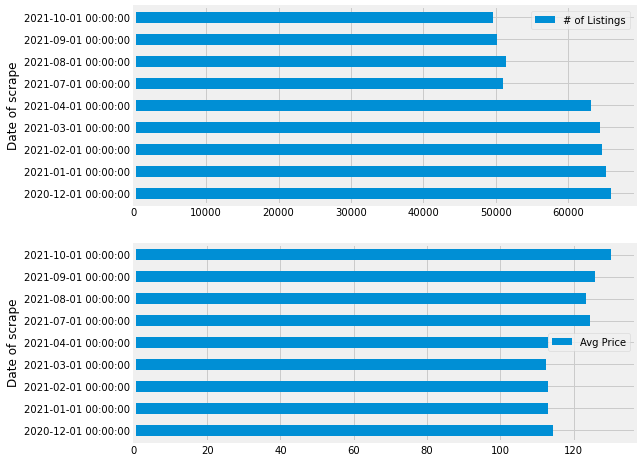

In [16]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

paris_summary_listings.plot(ax=ax1, kind='barh')
paris_summary_prices_avg.plot(ax=ax2, kind='barh')

In [17]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [19]:
master_df_paris = pd.concat(df_list_paris)
master_df_paris = master_df_paris[master_df_paris['room_type']=='Entire home/apt']
master_df_paris_unique = master_df_paris.drop_duplicates(subset='id')
#master_df_paris_unique = master_df_paris[master_df_paris_unique['room_type']=='Entire home/apt']
master_df_paris_unique['room_type'].value_counts()

Entire home/apt    67214
Name: room_type, dtype: int64

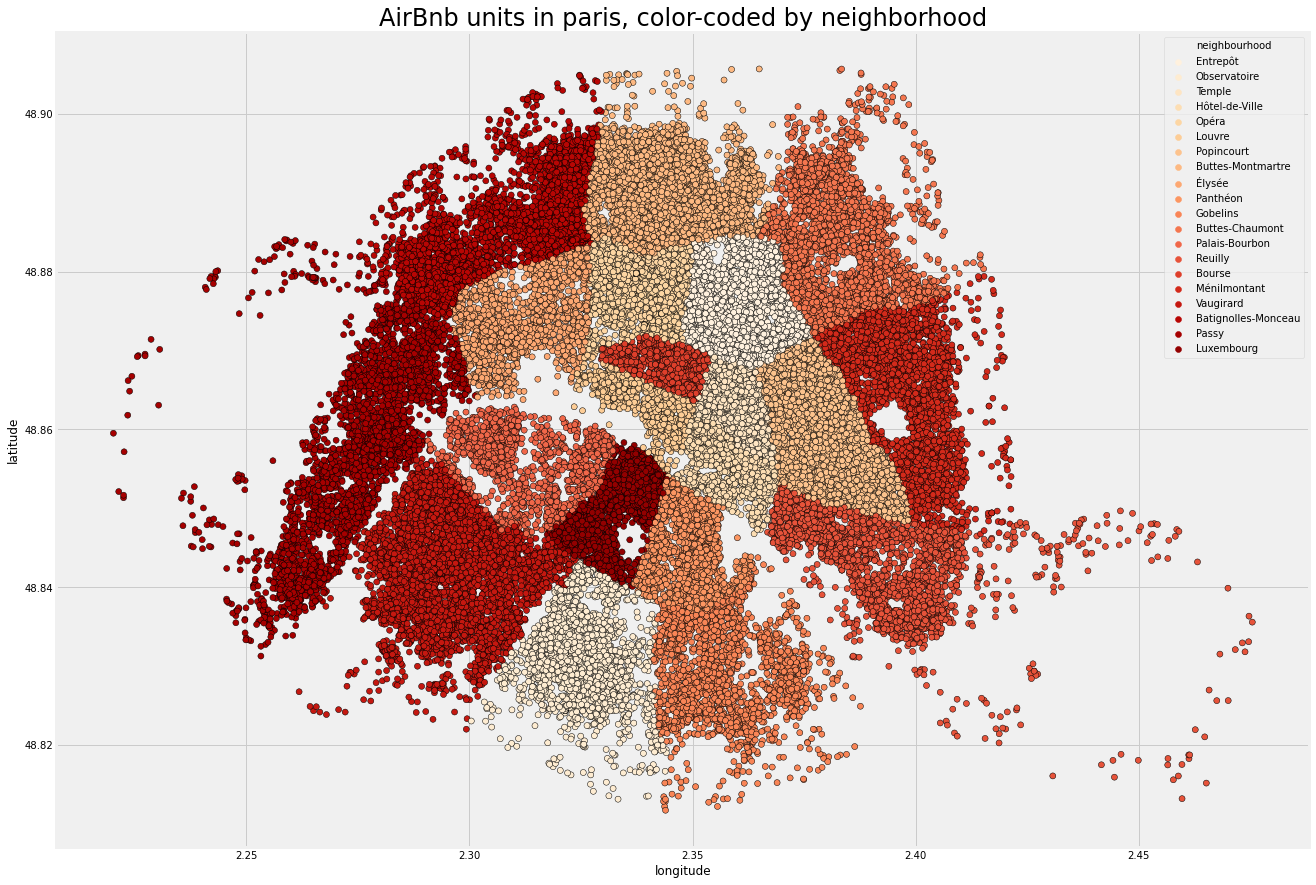

In [20]:
title = 'AirBnb units in paris, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_paris_unique.longitude, master_df_paris_unique.latitude, hue = master_df_paris_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_paris.png')
plt.show()

## Add review data through a join

In [23]:
df_reviews = pd.concat([paris_raw_df_10_6_2021,raw_df_paris],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
#df_reviews_.shape
df_reviews_.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,100,...,4.55,4.47,4.77,4.82,4.96,4.53,f,1,0,0
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,...,4.79,4.43,4.91,4.88,4.92,4.70,f,1,0,0
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,...,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,0


## Regression

In [18]:
#df_reviews_.columns

In [19]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [20]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -166.07572788286356
Coefficients:  [ 21.83998403  72.1564763   -3.72210277   1.07642378   1.91842266
   2.01482901  21.87872166  34.81862132 -36.53619747]
LinearRegression()


In [21]:
y_pred2 = regr.predict(X_)

In [22]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(30384, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

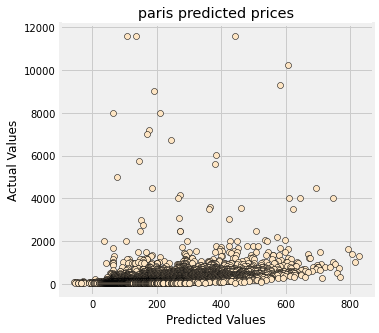

In [23]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('paris predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [24]:
df_result.index

Int64Index([44622, 43409, 49052, 34548, 18149, 29523,   214, 30629, 24864,
              216,
            ...
            43813,  6963, 37438, 29014,   499, 16144,  4944, 13628,  8364,
            47566],
           dtype='int64', length=30384)

In [26]:
df_result['id'] = df_result.index.values
df_result.shape

(30384, 4)

In [27]:
raw_df_paris.index.values
df_result.index.values

array([44622, 43409, 49052, ..., 13628,  8364, 47566])

In [28]:
df_result_merge = df_result.merge(raw_df_paris, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(49634, 77)

In [29]:
df_join = df_result.join(raw_df_paris, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                             0
Predicted                                          0
Diff                                               0
id_x                                               0
id_y                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               6330
Length: 78, dtype: int64

In [30]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [31]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_paris = df_print[df_print['Predicted']>0]
df_print_paris.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
44622,44622,11600,"$11,600.00",107.219106,-11492.780894,https://www.airbnb.com/rooms/48441158,48.89130,2.32154,4,Batignolles-Monceau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
43409,43409,11600,"$11,600.00",133.978888,-11466.021112,https://www.airbnb.com/rooms/46327664,48.85108,2.39325,4,Popincourt,3.67,5.0,3.33,4.67,4.67,4.33,2.67,3
49052,49052,11600,"$11,600.00",443.562131,-11156.437869,https://www.airbnb.com/rooms/52278335,48.87825,2.34395,10,Opéra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34548,34548,10250,"$10,250.00",606.721797,-9643.278203,https://www.airbnb.com/rooms/37250543,48.86447,2.27903,10,Passy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18149,18149,9000,"$9,000.00",192.407245,-8807.592755,https://www.airbnb.com/rooms/18424066,48.84538,2.28960,4,Vaugirard,5.00,5.0,4.50,5.00,5.00,5.00,5.00,2


In [32]:
df_print_paris['neighbourhood_cleansed'].value_counts()

Buttes-Montmartre      3370
Popincourt             2913
Entrepôt               2207
Vaugirard              2140
Batignolles-Monceau    1925
Temple                 1680
Buttes-Chaumont        1584
Ménilmontant           1565
Passy                  1523
Opéra                  1484
Reuilly                1209
Bourse                 1197
Hôtel-de-Ville         1149
Observatoire           1069
Panthéon               1000
Gobelins                920
Élysée                  912
Luxembourg              898
Palais-Bourbon          895
Louvre                  710
Name: neighbourhood_cleansed, dtype: int64

In [33]:
df_print_paris_final = df_print_paris.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_paris_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [98]:
df_paris_query = df_print_paris_final.query('number_of_reviews >11 & accommodates <=300')
df_paris_query.shape
#df_paris_query.head()

(11686, 18)

In [99]:
df_paris_query_filter = df_paris_query.query('accommodates<20 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_paris_query_filter.shape


(8899, 18)

In [100]:
df_paris_query_filter.shape

(8899, 18)

In [101]:
df_neighborhood_plot = df_print_paris_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
19,Élysée,264.102603
8,Luxembourg,221.117403
7,Louvre,211.235081
12,Palais-Bourbon,208.410714
14,Passy,202.953262
1,Bourse,192.093117
17,Temple,188.508909
6,Hôtel-de-Ville,188.246871
13,Panthéon,160.864303
11,Opéra,154.014821


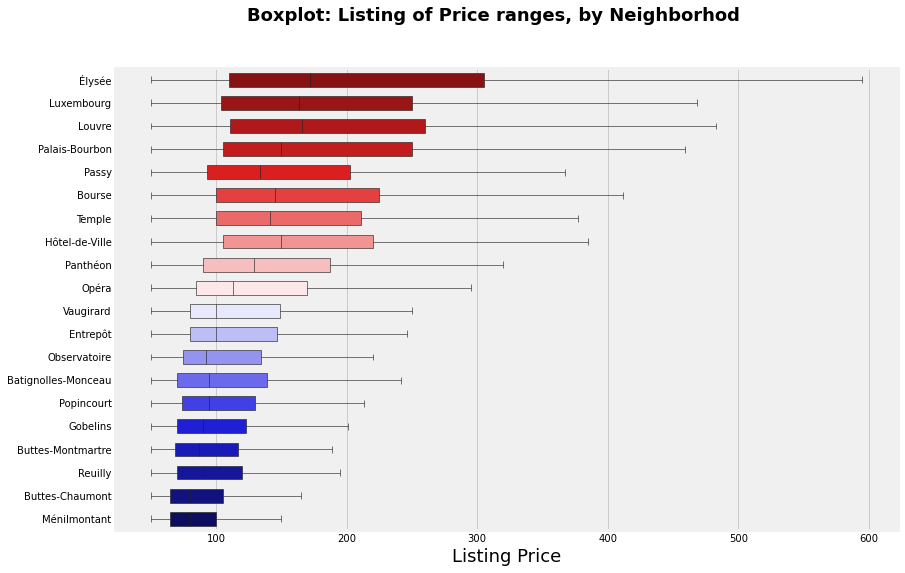

In [102]:
df_neighborhood_plot = df_print_paris_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,8))
dft = df_print_paris_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

fig.savefig('paris_neighborhood_boxplot.png')

In [103]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [104]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_paris)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 49634 files in the dataset
There is 26116 to be regressed with accommodates <=4


In [105]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  -85.4569927814054
Coefficients:  [ 12.56249152  48.06789107   0.32193621   0.79077933   2.87702543
   1.34023017  19.24834014  31.91215807 -36.41364081]
LinearRegression()


In [106]:
y_pred2_4 = regr4.predict(X_4)

In [107]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(24513, 3)

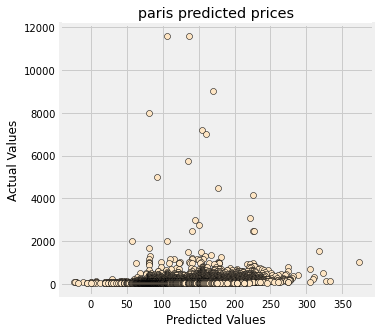

In [108]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('paris predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [109]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_paris)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 49634 files in the dataset
There is 12079 to be regressed with accommodates <=2


In [110]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -70.23490414524753
Coefficients:  [ 33.76828304   9.25532592   1.98182857   0.68026994   0.52692
 -11.7473466   20.36325814  22.10248657 -14.99370508]
LinearRegression()


In [111]:
y_pred2_2 = regr2.predict(X_2)

In [112]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(10914, 3)

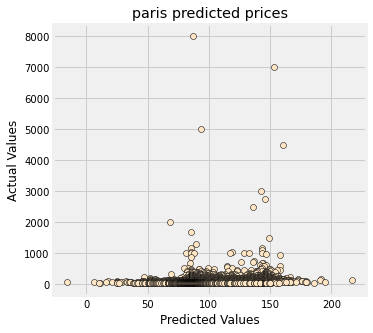

In [113]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('paris predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression function, rooms for 6 or less

In [114]:
## Regression fucntion, rooms for 2 or less

In [115]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=20]
print(f'There is {len(raw_df_paris)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 49634 files in the dataset
There is 32005 to be regressed with accommodates <=6


In [116]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -166.07572788286356
Coefficients:  [ 21.83998403  72.1564763   -3.72210277   1.07642378   1.91842266
   2.01482901  21.87872166  34.81862132 -36.53619747]
LinearRegression()


In [117]:
y_pred6_6 = regr6.predict(X_6)

In [118]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(30384, 3)

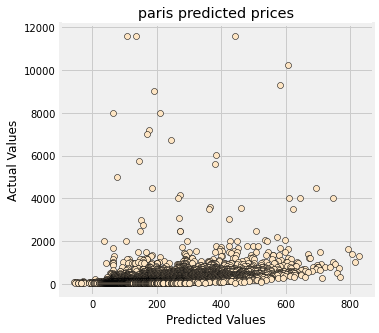

In [119]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('paris predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [120]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_paris)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 49634 files in the dataset
There is 32005 to be regressed


In [121]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -166.07572788286356
Coefficients:  [ 21.83998403  72.1564763   -3.72210277   1.07642378   1.91842266
   2.01482901  21.87872166  34.81862132 -36.53619747]
LinearRegression()


In [122]:
y_predall_all = regrall.predict(X_all)

In [123]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(30384, 3)

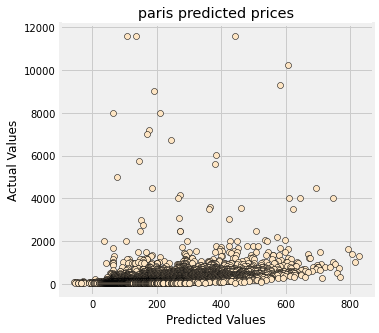

In [124]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('paris predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [125]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
1,7397,Entire rental unit,Entire home/apt,4,2.0,2.0,105,3,4.700000,4.790000,4.430000,4.920000,4.700000
2,7964,Entire rental unit,Entire home/apt,2,1.0,1.0,130,18,4.800000,5.000000,5.000000,5.000000,5.000000
3,9359,Entire rental unit,Entire home/apt,2,1.0,1.0,75,0,4.616914,4.777784,4.612234,4.813205,4.638743
4,9952,Entire rental unit,Entire home/apt,2,1.0,1.0,80,2,4.940000,4.970000,4.880000,4.910000,4.940000
7,10917,Entire rental unit,Entire home/apt,4,1.0,2.0,143,0,4.060000,4.500000,4.190000,4.400000,4.060000


In [126]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_) # no constraints on # guests

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_) # 2 guests

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_) # 4 guests or less

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_) # 6 guests or less


Intercept:  -166.07572788286356
Coefficients:  [ 21.83998403  72.1564763   -3.72210277   1.07642378   1.91842266
   2.01482901  21.87872166  34.81862132 -36.53619747]
Intercept:  -70.23490414524753
Coefficients:  [ 33.76828304   9.25532592   1.98182857   0.68026994   0.52692
 -11.7473466   20.36325814  22.10248657 -14.99370508]
Intercept:  -85.4569927814054
Coefficients:  [ 12.56249152  48.06789107   0.32193621   0.79077933   2.87702543
   1.34023017  19.24834014  31.91215807 -36.41364081]
Intercept:  -166.07572788286356
Coefficients:  [ 21.83998403  72.1564763   -3.72210277   1.07642378   1.91842266
   2.01482901  21.87872166  34.81862132 -36.53619747]


In [127]:
df_paris_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
16105,16105,1386,"$1,386.00",804.274761,-581.725239,https://www.airbnb.com/rooms/15658427,48.86758,2.34723,14,Bourse,4.97,5.00,4.97,5.00,5.00,4.97,4.85,37
13628,13628,280,$280.00,712.896392,432.896392,https://www.airbnb.com/rooms/13243111,48.86898,2.36018,16,Entrepôt,4.58,4.78,4.59,4.84,4.84,4.80,4.55,151
33174,33174,810,$810.00,682.605244,-127.394756,https://www.airbnb.com/rooms/35984086,48.86271,2.33802,12,Louvre,4.81,4.85,4.77,4.71,4.81,4.98,4.69,52
16945,16945,707,$707.00,660.663893,-46.336107,https://www.airbnb.com/rooms/16905683,48.85196,2.38186,10,Popincourt,4.82,4.85,4.94,4.88,4.90,4.81,4.67,111
11705,11705,350,$350.00,659.281582,309.281582,https://www.airbnb.com/rooms/11412291,48.86219,2.34924,16,Louvre,4.63,4.85,4.82,4.83,4.89,4.85,4.54,194


## Find the highest predicted in paris - <= 4

In [128]:
df_paris_query_filter['% Diff'] = (df_paris_query_filter['Actual']/df_paris_query_filter['Predicted']-1)* 100
df_paris_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_paris_query_final = df_paris_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_paris_query_final)} listings that meet criteria')
df_paris_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head(6)


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 8899 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
16105,1386,804.27,72.33,4.97,5.00,4.97,4.97,4.85,Bourse,https://www.airbnb.com/rooms/15658427,14,37
13628,280,712.90,-60.72,4.58,4.78,4.59,4.80,4.55,Entrepôt,https://www.airbnb.com/rooms/13243111,16,151
33174,810,682.61,18.66,4.81,4.85,4.77,4.98,4.69,Louvre,https://www.airbnb.com/rooms/35984086,12,52
16945,707,660.66,7.01,4.82,4.85,4.94,4.81,4.67,Popincourt,https://www.airbnb.com/rooms/16905683,10,111
11705,350,659.28,-46.91,4.63,4.85,4.82,4.85,4.54,Louvre,https://www.airbnb.com/rooms/11412291,16,194
20731,720,653.59,10.16,4.86,4.93,4.80,4.93,4.93,Popincourt,https://www.airbnb.com/rooms/20798740,10,22


## Find the best deal in paris - <=4

In [97]:
df_paris_deal = df_paris_query_final[df_paris_query_final['Price']<10000].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_paris_deal.head(7)


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
16344,50,263.69,-81.04,4.53,4.68,3.87,4.58,4.70,Buttes-Chaumont,https://www.airbnb.com/rooms/16060612,5,41
22594,70,303.77,-76.96,4.65,4.83,4.83,4.83,4.60,Popincourt,https://www.airbnb.com/rooms/22830473,6,158
6592,65,275.44,-76.40,4.55,4.68,3.90,4.74,4.53,Vaugirard,https://www.airbnb.com/rooms/6524082,6,20
3435,65,266.21,-75.58,4.60,4.60,4.51,4.74,4.67,Reuilly,https://www.airbnb.com/rooms/3389725,4,44
23516,60,245.34,-75.54,4.85,4.95,4.70,4.90,4.85,Popincourt,https://www.airbnb.com/rooms/23973499,4,20
24056,92,358.00,-74.30,4.90,4.97,4.90,4.90,4.87,Entrepôt,https://www.airbnb.com/rooms/24642833,6,31
10477,91,346.75,-73.76,4.72,4.78,4.28,4.83,4.72,Entrepôt,https://www.airbnb.com/rooms/9687177,6,18
